In [13]:
import tensorflow as tf
import numpy as np
import pprint
tf.set_random_seed(777)

In [14]:
import os
os.chdir("C:/Users/snuist/Desktop")

# Tensor Manipulation

In [15]:
pp = pprint.PrettyPrinter(indent=4) #복잡한 데이터를 깔끔하게 표현

In [16]:
sess = tf.InteractiveSession()

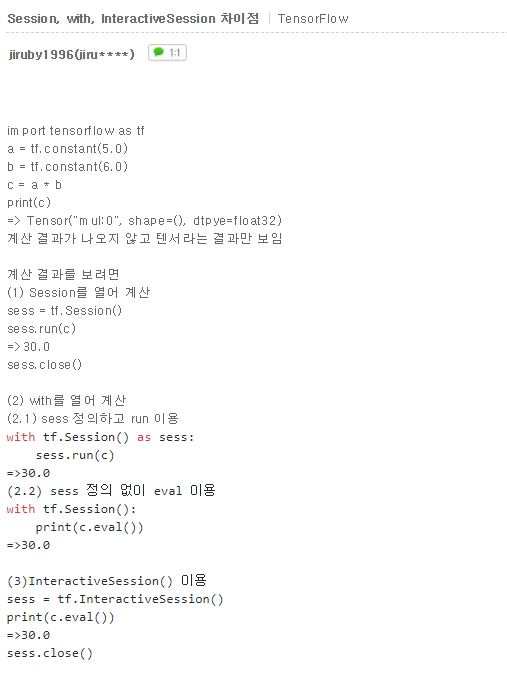

In [17]:
from IPython.display import Image
Image(filename='sess.diff.jpg', width=500)

## Simple Array

In [24]:
t = np.array([0., 1., 2., 3., 4., 5., 6.])
pp.pprint(t)
print(t.ndim)
print(t.shape)
print(t[0], t[-1], t[1], t[-2])
print(t[2:5], t[4: -1])
print(t[:2], t[3:])

array([0., 1., 2., 3., 4., 5., 6.])
1
(7,)
0.0 6.0 1.0 5.0
[2. 3. 4.] [4. 5.]
[0. 1.] [3. 4. 5. 6.]


## 2D Array

In [25]:
t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print(t)
pp.pprint(t)
print(t.ndim) # rank #[]의 수로 count
print(t.shape) #shape

[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.]])
2
(4, 3)


<pre>
Rank: 차원의 수 // 0: scalar 1: vector 2: matrix 3~: n-tensor

## Shape, Rank, Axis

In [35]:
t = tf.constant([1, 2, 3, 4])
print(tf.shape(t).eval())
print(tf.shape(t))

[4]
Tensor("Shape_6:0", shape=(1,), dtype=int32)


### eval ?????

In [33]:
sess = tf.Session()
c = tf.constant(5.0)
print(sess.run(c),"\n", c)

with tf.Session():
    print(c.eval(),"\n", c)

5.0 
 Tensor("Const_7:0", shape=(), dtype=float32)
5.0 
 Tensor("Const_7:0", shape=(), dtype=float32)


In [42]:
t = tf.constant([[1, 2],[3, 4]])
print(tf.shape(t).eval)
print(tf.shape(t))        #()붙이지 않으면 tf.shape(t)와 같은 값
print(tf.shape(t).eval())
tf.shape(t).eval()

<bound method Tensor.eval of <tf.Tensor 'Shape_19:0' shape=(2,) dtype=int32>>
Tensor("Shape_20:0", shape=(2,), dtype=int32)
[2 2]


array([2, 2])

In [70]:
t = tf.constant([[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],[[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]])
print(tf.shape(t).eval())
print(tf.shape(t))
#가장 작은 괄호 부터 갯수를 세고, 가장 오른 쪽에서부터 수를 채워나감

[1 2 3 4]
Tensor("Shape_38:0", shape=(4,), dtype=int32)


In [45]:
[
    [
        [
            [1,2,3,4], 
            [5,6,7,8],
            [9,10,11,12]
        ],
        [
            [13,14,15,16],
            [17,18,19,20], 
            [21,22,23,24]
        ]
    ]
]

[[[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
  [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]]]

## Matmul VS Multiply

In [52]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])
#tf.matmul(matrix1, matrix2)
print(tf.shape(matrix1).eval())
print(tf.shape(matrix2).eval())
print(tf.matmul(matrix1, matrix2).eval()) #값들의 곱

[1 2]
[2 1]
[[12.]]


In [56]:
print((matrix1*matrix2).eval())
print(tf.shape(matrix1*matrix2).eval())

[[6. 6.]
 [6. 6.]]
[2 2]


## Watch out broadcasting

In [60]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2.], [2.]])
(matrix1 + matrix2).eval() #더할 때 알아서 맞춰져서 더해져버림

array([[5., 5.],
       [5., 5.]], dtype=float32)

In [59]:
matrix1 = tf.constant([[3., 3.]])
matrix2 = tf.constant([[2., 2.]])
(matrix1 + matrix2).eval()

array([[5., 5.]], dtype=float32)

## Random values for variable initializations

In [61]:
tf.random_normal([3]).eval()

array([-1.246367  ,  1.417959  ,  0.01115137], dtype=float32)

In [62]:
tf.random_uniform([3]).eval()

array([0.45182753, 0.42974818, 0.03118789], dtype=float32)

In [63]:
tf.random_uniform([2, 3]).eval()

array([[0.49087906, 0.24211693, 0.2996019 ],
       [0.9096364 , 0.8303386 , 0.31524897]], dtype=float32)

## Reduce Mean / Sum

In [67]:
print(tf.reduce_mean([1, 2], axis=0).eval())
print(tf.reduce_mean([1, 2], axis=-1).eval())
print(tf.reduce_mean([1., 2.], axis=0).eval())

1
1
1.5


In [82]:
x = [[1., 2.], [3., 4.], [5., 6.]]
print(tf.shape(x).eval())
print(tf.reduce_mean(x).eval()) # 1+2+3+4)

[3 2]
3.5


In [77]:
tf.reduce_mean(x, axis=0).eval()

array([3., 4.], dtype=float32)

In [78]:
tf.reduce_mean(x, axis=1).eval()

array([1.5, 3.5, 5.5], dtype=float32)

In [79]:
tf.reduce_mean(x, axis=-1).eval()

array([1.5, 3.5, 5.5], dtype=float32)

In [75]:
tf.reduce_mean(tf.reduce_sum(x, axis=-1)).eval()

5.0

## Tensorflow VS Numpy Array?

In [91]:
x = [[1., 2.], [3., 4.], [5., 6.]]
print(tf.shape(x).eval())
print(tf.reduce_mean(x, axis=1).eval())
print(tf.reduce_mean(x, axis=0).eval())
print(tf.reduce_mean(x, axis=-1).eval())

[3 2]
[1.5 3.5 5.5]
[3. 4.]
[1.5 3.5 5.5]


In [89]:
x = np.array([[1., 2.], [3., 4.], [5., 6.]])
print(x.shape)
print(np.mean(x, axis=1)) #row
print(np.mean(x, axis=0)) #col
print(np.mean(x, axis=-1))

(3, 2)
[1.5 3.5 5.5]
[3. 4.]
[1.5 3.5 5.5]


## Argmax with axis

In [92]:
x = [[0, 1, 2], [2, 1, 0]]
tf.argmax(x, axis=0).eval()

array([1, 0, 0], dtype=int64)

In [93]:
tf.argmax(x, axis=1).eval()

array([2, 0], dtype=int64)

In [94]:
tf.argmax(x, axis=-1).eval()

array([2, 0], dtype=int64)

## Reshape, squeeze, expand_dims

In [96]:
t = np.array([[[0, 1, 2],
              [3, 4, 5]],
             
             [[6, 7, 8],
             [9, 10, 11]]])
t.shape

(2, 2, 3)

In [98]:
tf.reshape(t, shape=[-1, 3]).eval() #3은 지정하고 -1은 너 마음대로 해라

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [100]:
tf.reshape(t,shape=[-1, 1, 3]).eval()

array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])

In [105]:
print(tf.shape([[0], [1], [2]]).eval())
print(tf.squeeze([[0], [1], [2]]).eval())
print(tf.shape(tf.squeeze([[0], [1], [2]]).eval()).eval())

[3 1]
[0 1 2]
[3]


In [108]:
print(tf.expand_dims([0, 1, 2], 1).eval())
print(tf.shape(tf.expand_dims([0, 1, 2], 1).eval()).eval())

[[0]
 [1]
 [2]]
[3 1]


## One-hot

In [110]:
tf.one_hot([[0], [1], [2], [0]], depth=3).eval()

array([[[1., 0., 0.]],

       [[0., 1., 0.]],

       [[0., 0., 1.]],

       [[1., 0., 0.]]], dtype=float32)

In [112]:
tf.one_hot([[0], [1], [2], [0]], depth=2).eval()

array([[[1., 0.]],

       [[0., 1.]],

       [[0., 0.]],

       [[1., 0.]]], dtype=float32)

In [113]:
t = tf.one_hot([[0], [1], [2], [0]], depth=3)
tf.reshape(t, shape=[-1, 3]).eval()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

## Casting

In [114]:
tf.cast([1.8, 2.2, 3.3, 4.9], tf.int32).eval()

array([1, 2, 3, 4])

In [116]:
tf.cast([True, False, 1==1, 0==1], tf.int32).eval()

array([1, 0, 1, 0])

In [118]:
tf.cast([True, False, 1==1, 0==1], tf.float32).eval()

array([1., 0., 1., 0.], dtype=float32)

## Stack

In [120]:
x = [1, 4]
y = [2, 5]
z = [3, 6]

#Pack along first dim
tf.stack([x, y, z]).eval()

array([[1, 4],
       [2, 5],
       [3, 6]])

In [122]:
tf.stack([x, y, z], axis=1).eval()

array([[1, 2, 3],
       [4, 5, 6]])

## Ones like and Zeros like

In [123]:
x = [[0, 1, 2],
    [2, 1, 0]]

tf.ones_like(x).eval()

array([[1, 1, 1],
       [1, 1, 1]])

In [124]:
tf.zeros_like(x).eval()

array([[0, 0, 0],
       [0, 0, 0]])

## Zip

In [125]:
for x, y in zip([1, 2, 3], [4, 5, 6]):
    print(x, y)

1 4
2 5
3 6


In [133]:
for x, y, z in zip([1, 2, 3], [4, 5, 6], [7, 8, 9]):
    print(x, y, z, x)

1 4 7 1
2 5 8 2
3 6 9 3


## Transpose

In [136]:
t = np.array([[[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 10, 11]]])
pp.pprint(t.shape)
pp.pprint(t)
print(t.shape)
print(t)

(1, 4, 3)
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]]])
(1, 4, 3)
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]]


In [139]:
t1 = tf.transpose(t, [1, 0, 2])
pp.pprint(sess.run(t1).shape)
pp.pprint(sess.run(t1))

(4, 1, 3)
array([[[ 0,  1,  2]],

       [[ 3,  4,  5]],

       [[ 6,  7,  8]],

       [[ 9, 10, 11]]])


In [141]:
t1 = tf.transpose(t, [2, 1, 0])
pp.pprint(sess.run(t1).shape)
pp.pprint(sess.run(t1))

(3, 4, 1)
array([[[ 0],
        [ 3],
        [ 6],
        [ 9]],

       [[ 1],
        [ 4],
        [ 7],
        [10]],

       [[ 2],
        [ 5],
        [ 8],
        [11]]])
